## Data Visualisation: An Intro to Plotly

In [1]:
import numpy as np
import pandas as pd

We have looked at other libraries designed to build "static" visualizations, like [Matplotlib](https://kyso.io/KyleOS/intro-to-matplotlib) and [Seaborn](https://kyso.io/KyleOS/intro-to-seaborn). Plotly's graphing library, on the other hand, makes interactive, publication-quality graphs online, that are designed to maximise interactivity and animation. This guide will quickly run through the basics and give a few examples, while a future post will expand on some of Plotly's more complex capabilities.

Plotly at its core is a data visualization toolbox. Under every plotly graph is a JSON object, which is a dictionary-like data structure. Moreover, Plotly plots are interactive, meaning you can manually explore the data by panning, selecting and zooming on the graphing surface (among other possible actions). Whether you see Plotly graphs in a browser or in a Jupyter notebook, all the visualizations and interactiveness is made possible by plotly.js.

### Getting Set Up

You can work with plotly online or offline (see the [docs](https://plot.ly/python/offline/) for more info). On Kyso, we will use the following commands to initiate offline plotting so all of the generate plots are viewable on our frontend.

In [2]:
import plotly
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot

plotly.offline.init_notebook_mode(connected=True)

Note, if you have a plotly account, you can still save your plots and data to your cloud account. To initialise plotly for online plotting, we would run the following command, substituting in our credentials.

`plotly.tools.set_credentials_file(username='DemoAccount', api_key='api_key')`

 - `py.plot( )` returns the unique url.

 - `py.iplot( )` displays the plot in the Jupyter notebook.

Now, to actually begin plotting our data. There are two main modules that we will need in order to generate Plotly graphs:

 - `plotly.plotly` contains the functions that will help us communicate with the Plotly servers.

 - `plotly.graph_objs` contains the functions that will generate graph objects for us.

In [3]:
import plotly.plotly as py
import plotly.graph_objs as go

### Plotly Objects

There are 3 objects that define a Plotly plot:

1. **Data** - a list object in Python. Data contains all the traces that you wish to plot. A trace is just the name we give a collection of data and the specifications of which we want that data plotted. These traces will be named according to how you want the data displayed on the plotting surface.

2. **Layout** - defines the look of the plot and plot features which are unrelated to the data. This refers to elements like the title, axis titles, spacing, font and and we can even draw shapes on top of plots!

3. **Figure** - Creates the final object to be plotted, creating a dictionary-like object that contains both the data object and the layout object.

### Some Basic Examples

Ok, so now that we know how to set up our plotting environment in the notebook, and we understand the fundamental concepts of the underlying objects, let's generate some random data and create some cool plots!

In [4]:
N = 1000
x = np.random.randn(N)
y = np.random.randn(N)
z = np.random.randn(N)

/opt/conda/lib/python3.6/site-packages/plotly/graph_objs/_deprecations.py:39: DeprecationWarning:

plotly.graph_objs.Data is deprecated.
Please replace it with a list or tuple of instances of the following types
  - plotly.graph_objs.Scatter
  - plotly.graph_objs.Bar
  - plotly.graph_objs.Area
  - plotly.graph_objs.Histogram
  - etc.




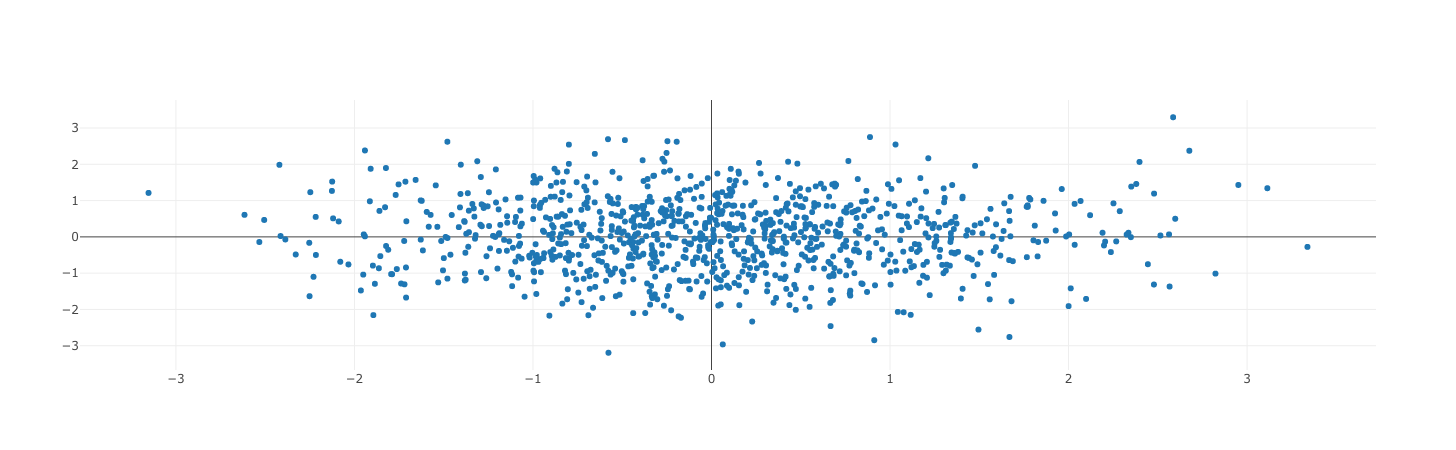

In [5]:
trace = go.Scatter(x=x, y=y, mode="markers")
                                               
# Can also simply assign: data = [trace]
data=go.Data([trace])


figure=go.Figure(data=data)

# Plot and embed in ipython notebook!
iplot(figure)

Above we created our scatter plot, set our mode to *markers*, assiged our data object to our trace, and then configured the plot layout.

Let's take a look at some more examples of scatter plots, using both the *markers* and *lines* modes.

In [6]:
x = np.linspace(0, 1, 200)
y0 = np.random.randn(200)+10
y1 = np.random.randn(200)
y2 = np.random.randn(200)-10

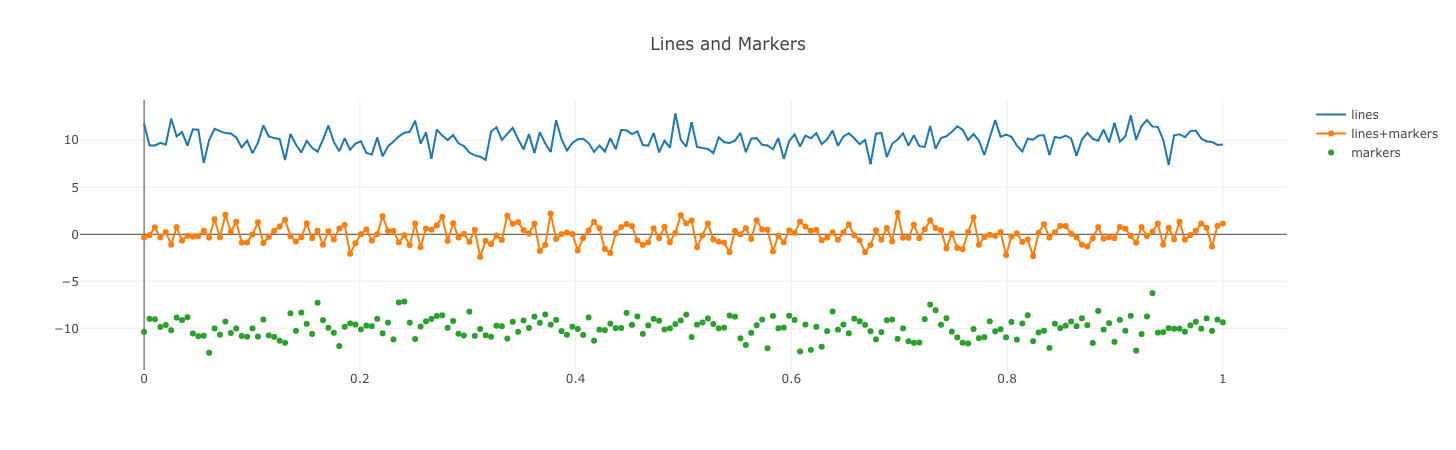

In [7]:
trace0 = go.Scatter(
    x = x,
    y = y0,
    mode = 'lines',
    name = 'lines'
)
trace1 = go.Scatter(
    x = x,
    y = y1,
    mode = 'lines+markers',
    name = 'lines+markers'
)
trace2 = go.Scatter(
    x = x,
    y = y2,
    mode = 'markers',
    name = 'markers'
)
data = [trace0, trace1, trace2]

layout = go.Layout(title="Lines and Markers")

fig = go.Figure(data=data,layout=layout)

iplot(fig)

How about a bar chart?

In [8]:
import random
x = ['A', 'B', 'C', 'D', 'E', 'F', 'G','H']
y = random.sample(range(1, 100), 8)

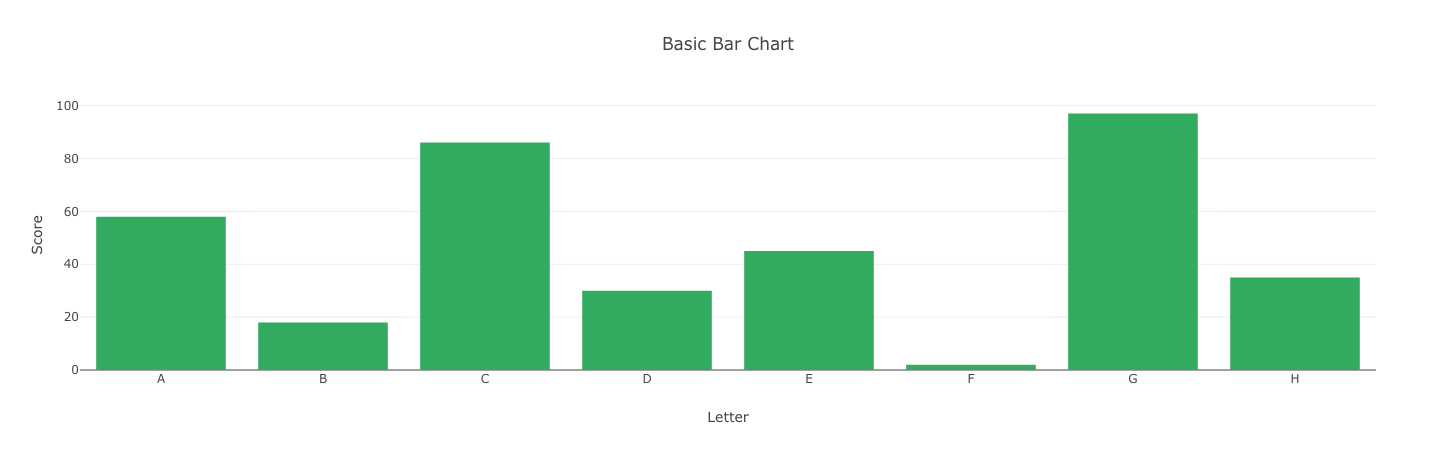

In [9]:
trace0 = go.Bar(
                x = x,
                y = y,
                marker = dict(color = 'rgba(50, 171, 96, 1.0)'),
                text = x)

data = [trace0]

layout = go.Layout(title="Basic Bar Chart", xaxis={'title':'Letter'}, yaxis={'title':'Score'})

fig = go.Figure(data=data,layout=layout)

iplot(fig)

Above, we manually passed the color method to our marker to our *Data* object, and we also set our axis titles in our *Layout* object.

We can set colors for each data trace we create. But, what about the color of our plot? Below, *paper_bgcolor* sets the color of the background, while *plot_bgcolor* sets the color within our plot.

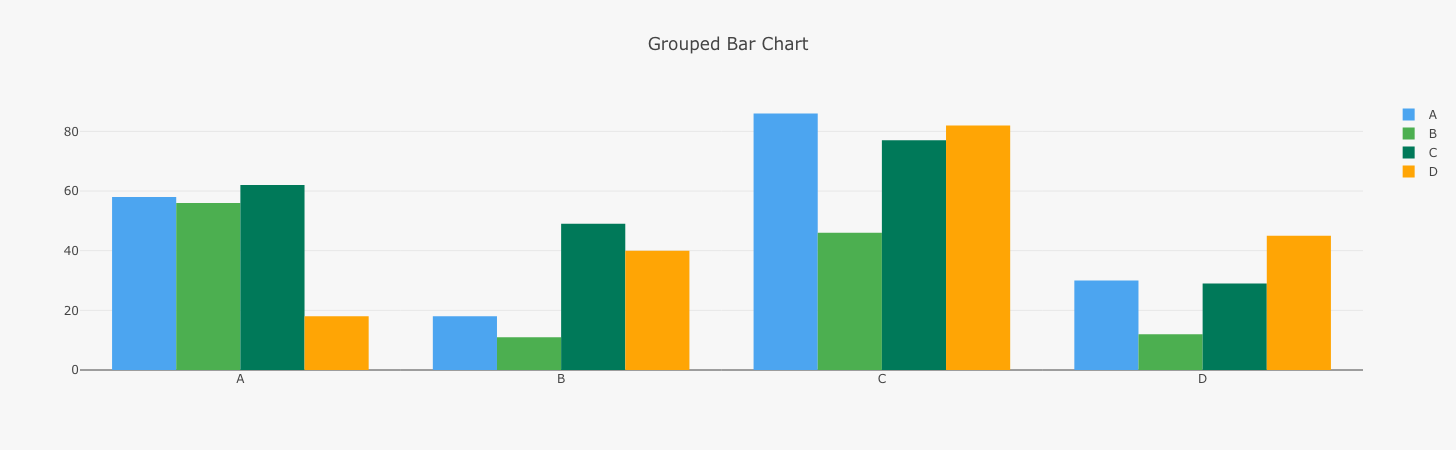

In [10]:
x = ['A', 'B', 'C', 'D']
y1 = random.sample(range(1, 100), 4)
y2 = random.sample(range(1, 100), 4)
y3 = random.sample(range(1, 100), 4)
y4 = random.sample(range(1, 100), 4)

trace1 = go.Bar(
    x = x,
    y = y,
    name = "A",
    marker = dict(color = "#4ca5f0")
)

trace2 = go.Bar(
    x = x,
    y = y1,
    name = "B", 
    marker = dict(color = "#4caf50")
)

trace3 = go.Bar(
    x = x,
    y = y3,
    name = "C",
    marker = dict(color = "#007959")
)

trace4 = go.Bar(
    x = x,
    y = y4,
    name = "D",
    marker = dict(color = "#FFA505")
)


data = [trace1, trace2, trace3, trace4]

layout = go.Layout(
    barmode = 'group', 
    paper_bgcolor = "#f7f7f7",
    plot_bgcolor = "#f7f7f7",
    title = "Grouped Bar Chart"
)

fig = go.Figure(data=data, layout=layout)

iplot(fig)

What about visualising some descriptive statistics of some sample data? Box plots are perfect just for this!

In [11]:
y0 = np.linspace(0.1, 10, 100)
y1 = np.linspace(1.1, 11, 100)
y2 = np.linspace(2.1, 12, 100)
y3 = np.linspace(3.1, 13, 100)

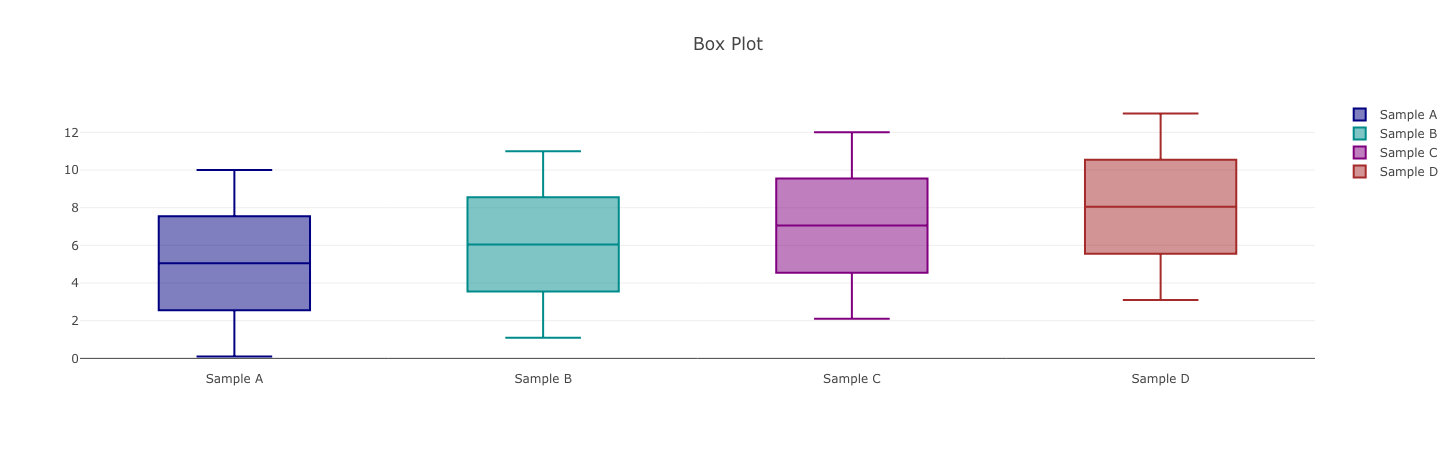

In [12]:
trace0 = go.Box(
    y=y0,
    name = 'Sample A',
    marker = dict(
        color = 'navy',
    )
)

trace1 = go.Box(
    y=y1,
    name = 'Sample B',
    marker = dict(
        color = 'darkcyan',
    )
)

trace2 = go.Box(
    y=y2,
    name = 'Sample C',
    marker = dict(
        color = 'purple',
    )
)

trace3 = go.Box(
    y=y3,
    name = 'Sample D',
    marker = dict(
        color = 'brown',
    )
)

data = [trace0, trace1, trace2, trace3]
layout = go.Layout(title='Box Plot')
fig = go.Figure(data=data, layout=layout)
iplot(fig)

### Plotly and Pandas

Ok, now that we have the basics of generating different types of plotly plots, let's apply this to a real dataset. For this guide we'll carry out simple EDA on a FIFA 18 data. 

*Source: https://www.kaggle.com/piyushgandhi811/fifa-18-updated-dataset*

In [18]:
df = pd.read_csv('data/FIFA18v2.csv')
df = df.drop(['Photo', 'Flag', 'Club Logo'], axis=1)
df.head()

,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Special,Acceleration,...,Reactions,Short Passing,Shot Power,Sliding Tackle,Sprint Speed,Stamina,Standing Tackle,Strength,Vision,Volleys
0,L. Messi,30,Argentina,94,94,FC Barcelona,118500000.0,565000.0,2161,92,...,95,88,85,26,87,73,28,59,92,86
1,Cristiano Ronaldo,32,Portugal,94,94,Real Madrid CF,95500000.0,565000.0,2228,89,...,96,83,94,23,91,92,31,80,85,88
2,Neymar,25,Brazil,92,93,Paris Saint-Germain,119500000.0,280000.0,2105,94,...,88,82,80,33,90,78,24,53,83,83
3,L. Suárez,30,Uruguay,92,92,FC Barcelona,97000000.0,510000.0,2321,88,...,93,83,87,38,77,89,45,83,84,88
4,M. Neuer,31,Germany,92,92,FC Bayern Munich,61000000.0,230000.0,1487,56,...,85,55,25,11,60,43,10,83,70,11


What's the distribution of all the players' age in the game?

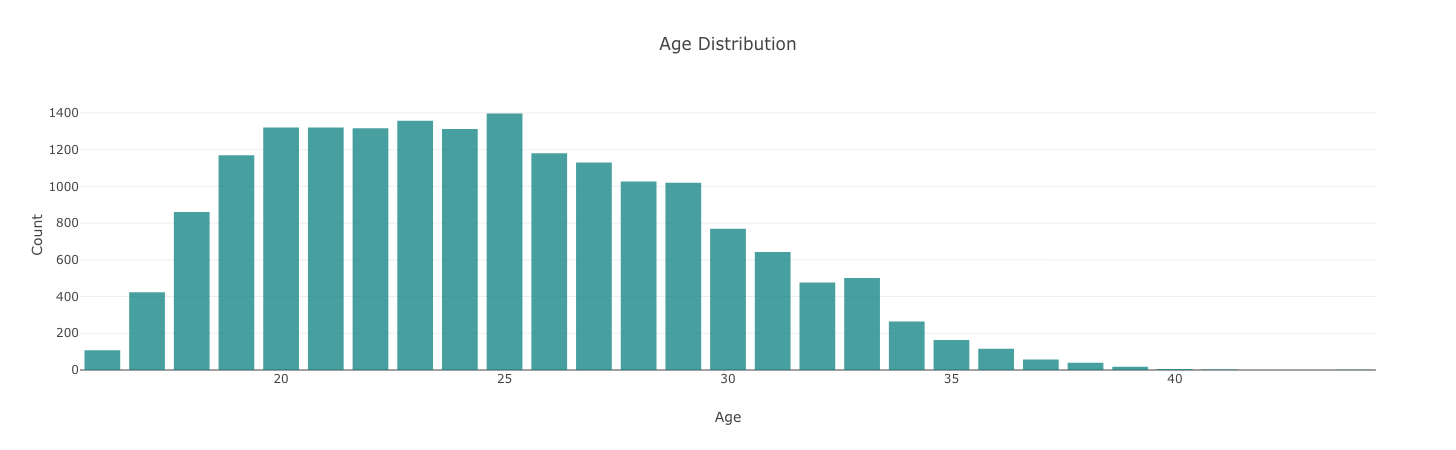

In [33]:
trace1 = go.Histogram(
    x=df.Age,
    opacity=0.75,
    name = "Age",
    marker=dict(color='rgb(12, 128, 128)')
    )

data = [trace1]
layout = go.Layout(
                   title='Age Distribution',
                   xaxis=dict(title='Age'),
                   yaxis=dict(title='Count'),
                   bargap = 0.20
)
fig = go.Figure(data=data, layout=layout)
iplot(fig)

And by their overall rating:

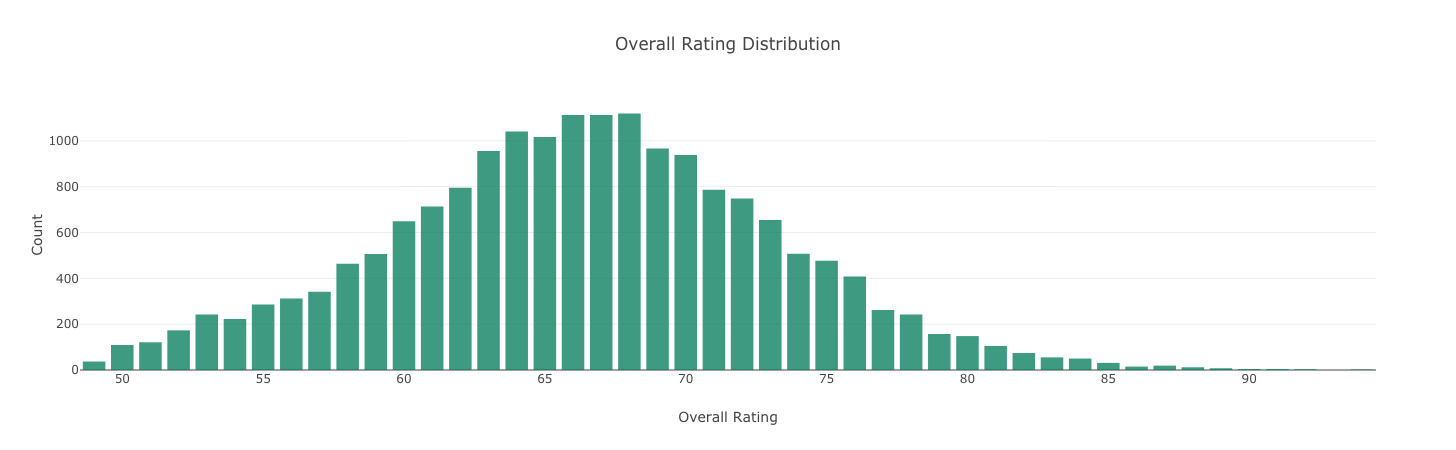

In [34]:
trace1 = go.Histogram(
    x=df.Overall,
    opacity=0.75,
    name = "Age",
    marker=dict(color='#007959')
    )

data = [trace1]
layout = go.Layout(
                   title='Overall Rating Distribution',
                   xaxis=dict(title='Overall Rating'),
                   yaxis=dict(title='Count'),
                   bargap = 0.20
)
fig = go.Figure(data=data, layout=layout)
iplot(fig)

This dataset is huge, with about 18 thousand players listed. Let's take a random sample of say, 500 players.

How about the geographical distribution? With plotly we cna plot a really cool choropleth map:

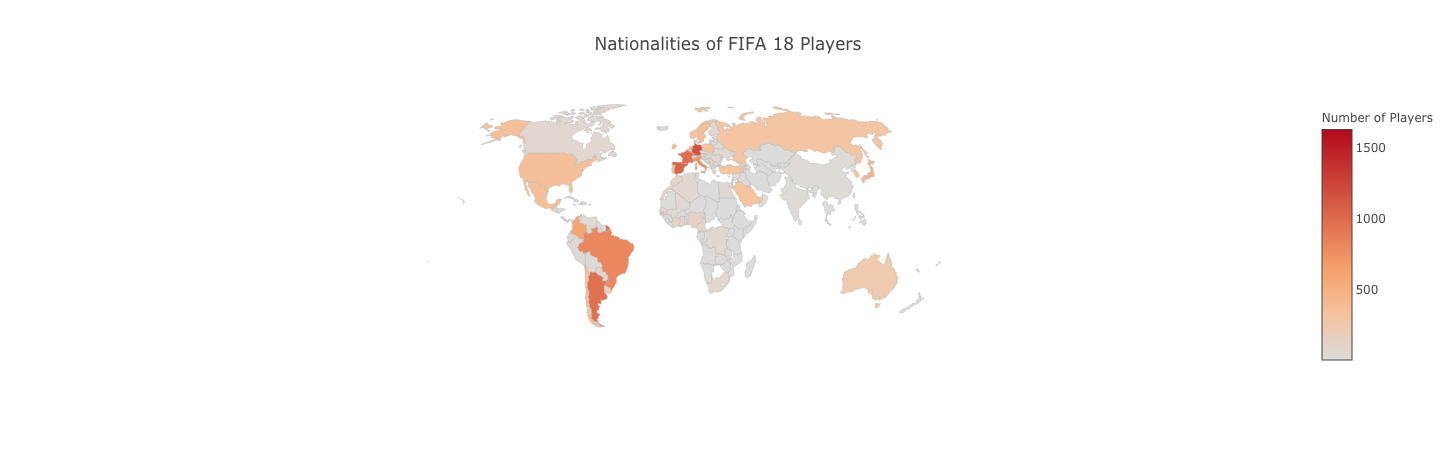

In [37]:
df_ = df.groupby("Nationality").size().reset_index(name="Count")

plotmap = [ dict(
        type = 'choropleth',
        locations = df_["Nationality"],
        locationmode = 'country names',
        z = df_["Count"],
        text = df_["Nationality"],
        autocolorscale = True,
        reversescale = False,
        marker = dict(
            line = dict (
                color = 'rgb(180,180,180)',
                width = 0.5
            ) ),
        colorbar = dict(
            title = "Number of Players"),
      ) ]

layout = dict(
    title = "Nationalities of FIFA 18 Players",
    geo = dict(
        showframe = False,
        showcoastlines = False,
        projection = dict(
            type = 'natural earth'
        )
    )
)

fig = dict( data=plotmap, layout=layout )
iplot(fig)

The distribution  of nationalities is clearly concentrated in Europe, with Brazil and Argentina also highly represented.

Does a player's market value and wage justify his ranking in FIFA 18's ratings? Let's find out!

In [41]:
df_ = df
df_ = df_.nlargest(100, 'Overall')
df_['Rank'] = ''
df_['Rank'] = np.arange(1, len(df_) + 1)

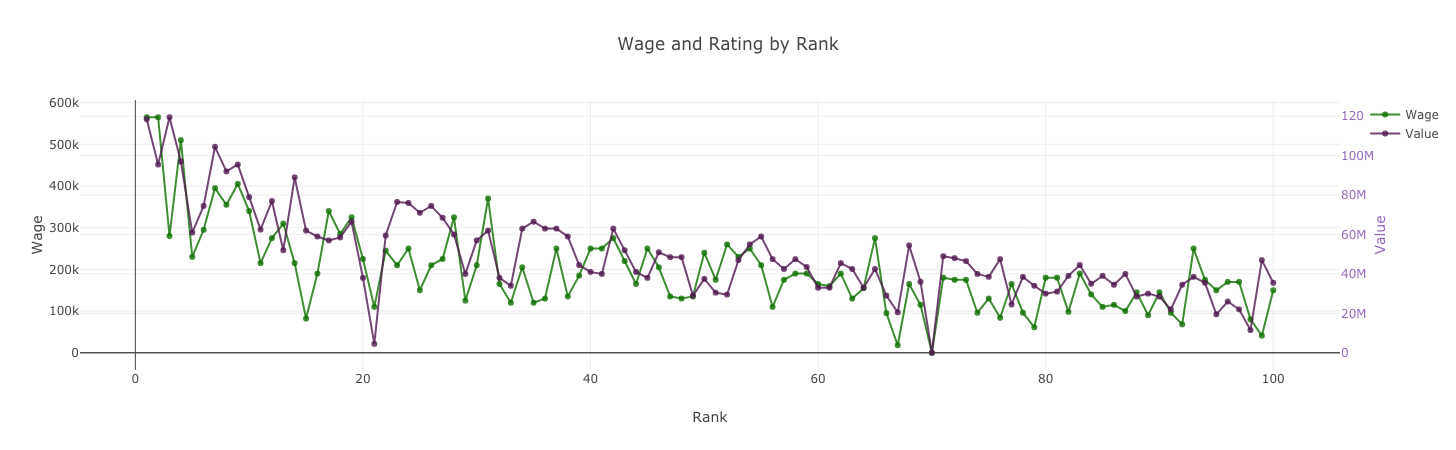

In [42]:
# Creating trace1
trace1 = go.Scatter(
                    x = df_.Rank,
                    y = df_.Wage,
                    mode = "lines+markers",
                    name = "Wage",
                    marker = dict(color = 'rgba(16, 112, 2, 0.8)'),
                    text= df_.Name)
# Creating trace2
trace2 = go.Scatter(
                    x = df_.Rank,
                    y = df_.Value,
                    mode = "lines+markers",
                    name = "Value",
                    marker = dict(color = 'rgba(80, 26, 80, 0.8)'),
                    text= df_.Name,
                    yaxis='y2')


data = [trace1, trace2]
layout = go.Layout(title='Wage and Rating by Rank', xaxis=dict(title='Rank'), yaxis=dict(title='Wage'), yaxis2=dict(title='Value', titlefont=dict(color='rgb(148, 103, 189)'), tickfont=dict(color='rgb(148, 103, 189)'), overlaying='y', side='right'))

fig = dict(data = data, layout = layout)
iplot(fig)

Ok, now let's get a distribution of the players' actual and potential overall rating as a function of their market value.

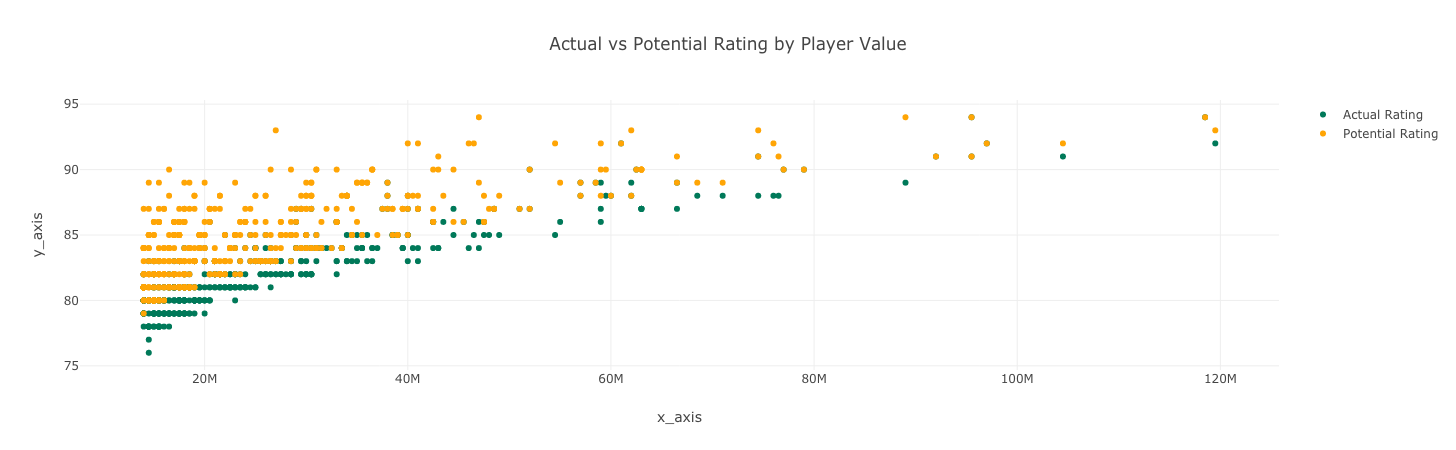

In [48]:
df_ = df.nlargest(500, 'Value')


# Creating trace1
trace1 = go.Scatter(
                    x = df_.Value,
                    y = df_.Overall,
                    mode = "markers",
                    name = "Actual Rating",
                    marker = dict(color = '#007959'),
                    text= df_.Name)
# Creating trace2
trace2 = go.Scatter(
                    x = df_.Value,
                    y = df_.Potential,
                    mode = "markers",
                    name = "Potential Rating",
                    marker = dict(color = '#FFA505'),
                    text= df_.Name)

data = [trace1, trace2]

layout = go.Layout(title="Actual vs Potential Rating by Player Value", xaxis={'title':'x_axis'}, yaxis={'title':'y_axis'})

fig = dict(data = data, layout = layout)
plotly.offline.iplot(fig)

A one would expect, overall rating has a positive relationship with a player's value. Also, as market value increases, the spread between actual and potential decreases on average. 

How are different clubs represented in this dataset? Which club has the highest number of players in the top 100 players in terms of overall rating?

In [52]:
df_ = df.nlargest(100, 'Overall')
df_ = pd.DataFrame(df_.groupby('Club').size())
df_.columns = ['Count']

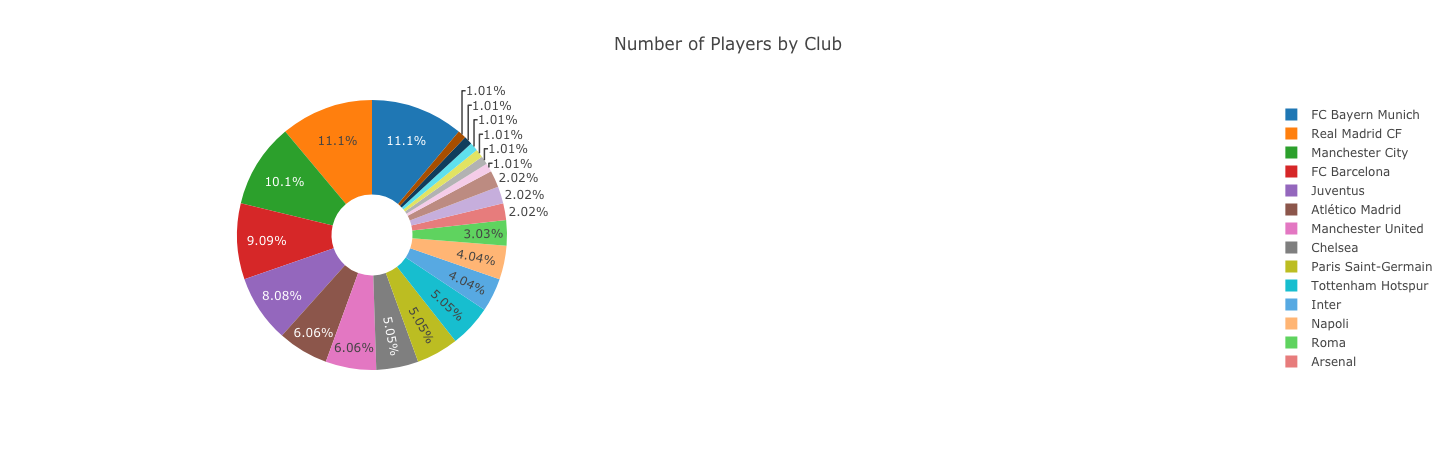

In [53]:
y = df_.Count
x = df_.index


trace = go.Pie(labels=x, values=y, domain={"x": [0, .5]}, hoverinfo="label+percent+name", hole=0.3)
data = [trace]
layout = go.Layout(title='Number of Players by Club')
fig = go.Figure(data=data, layout=layout)
iplot(fig)

Here, we see have added addtional parameters like *domain*, the *hole* diameter, as well as manually setting the hover information.

OK, how about visualising the the distribution of players' abilities between different countries?

In [54]:
df_spain = df.loc[df['Nationality'] == 'Spain']
df_brazil = df.loc[df['Nationality'] == 'Brazil']
df_england = df.loc[df['Nationality'] == 'England']

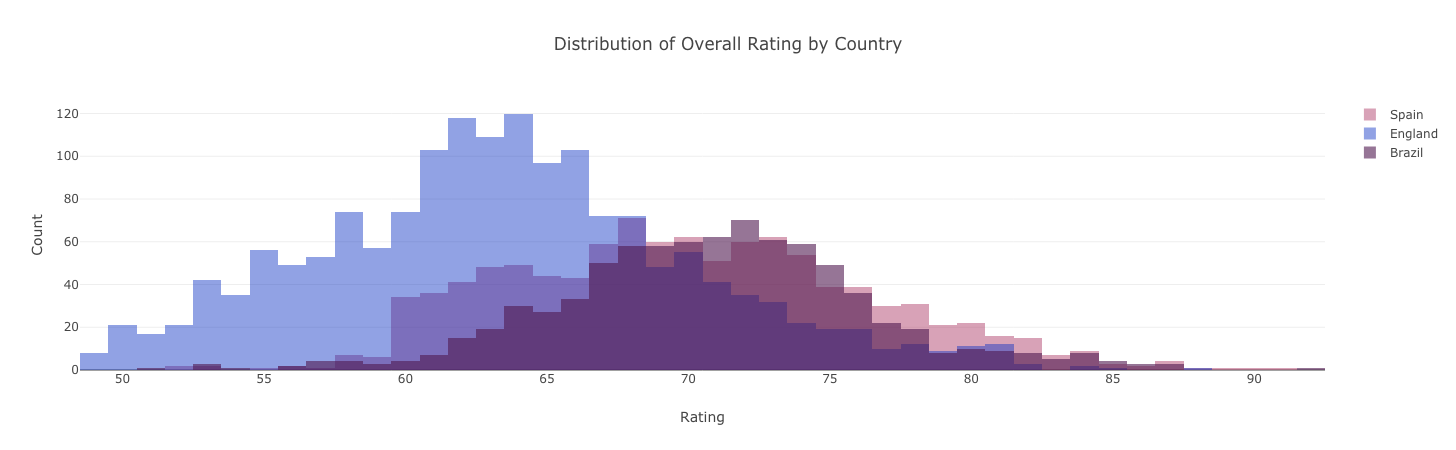

In [55]:
trace1 = go.Histogram(
    x=df_spain.Overall,
    opacity=0.75,
    name = "Spain",
    marker=dict(color='rgba(171, 50, 96, 0.6)'))

trace2 = go.Histogram(
    x=df_england.Overall,
    opacity=0.75,
    name = "England",
    marker=dict(color='rgba(12, 50, 196, 0.6)'))

trace3 = go.Histogram(
    x=df_brazil.Overall,
    opacity=0.75,
    name = "Brazil",
    marker=dict(color='rgba(80, 26, 80, 0.8)'))


data = [trace1, trace2, trace3]
layout = go.Layout(barmode='overlay',
                   title='Distribution of Overall Rating by Country',
                   xaxis=dict(title='Rating'),
                   yaxis=dict( title='Count'),
)
fig = go.Figure(data=data, layout=layout)
iplot(fig)

Spanish and Brazilean players clearly dominate the upper quartile, but to be fair, FIFA 18 includes more lower league players in England, in comparison to other countries. Disclaimer: I happen to be Irish & so took particular delight in this graph, while also acknowledging Ireland's dismal performance at international level, if and when we even qualify!😀

Let's step it up a notch & segment the dataset by top finishers, so that we can look at the attributes of the game's forwards and strikers. First, let's generate a box-plot for descriptive stats on the games' finishers by country.

In [61]:
df_russia = df.loc[df['Nationality'] == 'Russia']
df_france = df.loc[df['Nationality'] == 'France']
df_argentina = df.loc[df['Nationality'] == 'Argentina']
df_germany = df.loc[df['Nationality'] == 'Germany']

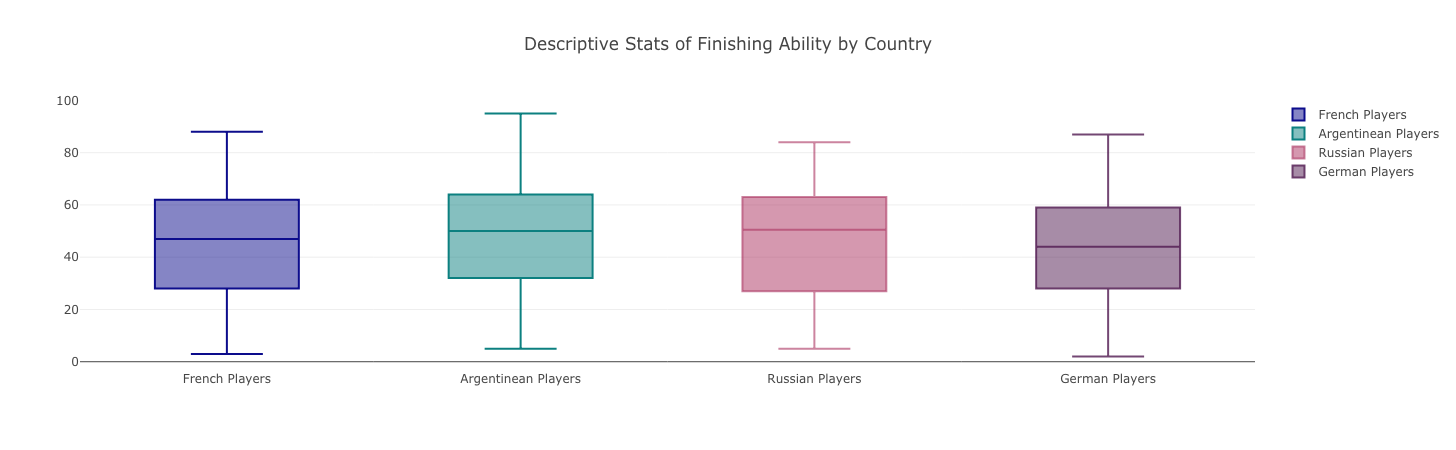

In [62]:
trace0 = go.Box(
    y=df_france.Finishing,
    name = 'French Players',
    marker = dict(
        color = 'rgb(12, 12, 140)',
    )
)
trace1 = go.Box(
    y=df_argentina.Finishing,
    name = 'Argentinean Players',
    marker = dict(
        color = 'rgb(12, 128, 128)',
    )
)
trace2 = go.Box(
    y=df_russia.Finishing,
    name = 'Russian Players',
    marker = dict(
        color = 'rgba(171, 50, 96, 0.6)',
    )
)
trace3 = go.Box(
    y=df_germany.Finishing,
    name = 'German Players',
    marker = dict(
        color = 'rgba(80, 26, 80, 0.8)',
    )
)
data = [trace0, trace1, trace2, trace3]
layout = go.Layout(title='Descriptive Stats of Finishing Ability by Country')
fig = go.Figure(data=data, layout=layout)
iplot(fig)

Argentina just about steals the show when it comes to prowess in front of goal.

Ok, one final plot, this time of the top 200 finishers in the game. Creating a bubble chart, where our y-values represent the players' *finishing* score, x-values their *Composure* and  the players' wages are represented by the marker size.

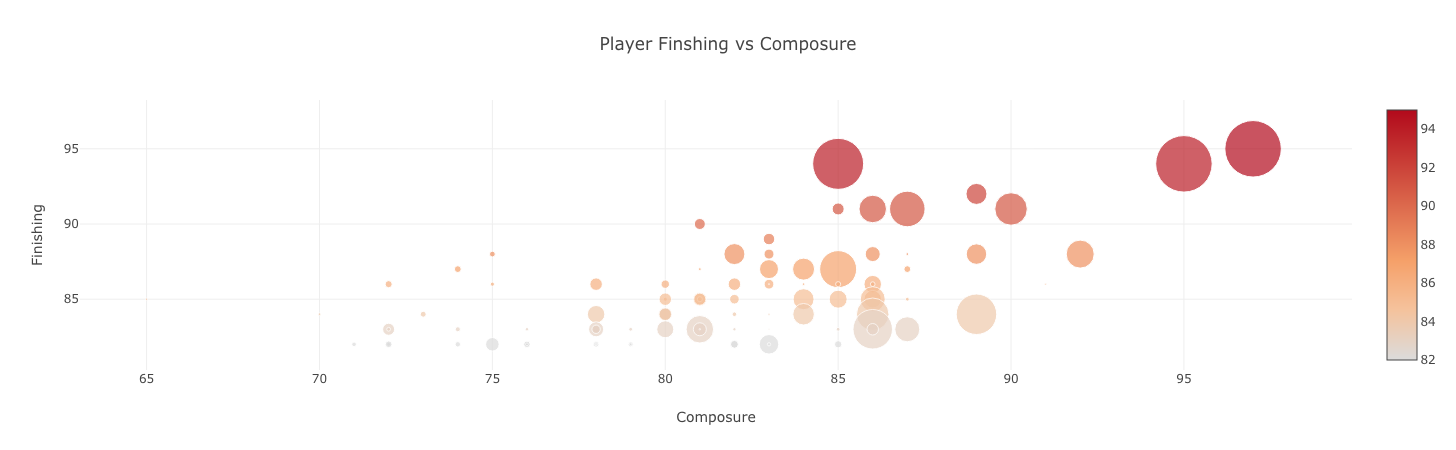

In [64]:
df_ = df.nlargest(100, 'Finishing')
df_['Wage'] = df_['Wage'] / 10000
color = [float(each) for each in df_.Finishing]


trace = go.Scatter(x=df_.Composure, y=df_.Finishing, mode='markers', marker={
    'color': color, 
    'size': df_.Wage, 
    'showscale': True
}, text=df_.Name )

data = [trace]
layout = go.Layout(title='Player Finshing vs Composure', xaxis=dict(title='Composure'), yaxis=dict( title='Finishing'))
fig = go.Figure(data=data, layout=layout)
iplot(fig)

Unsurprisingly, those two big red bubbles in the upper right-hand corner represent Ronaldo and Messi.

***

That's it for this guide guys. Hope you enjoyed it! Take a look at plotly's [documentation](https://plot.ly/python/) for more info on the types of plots we generated today and the various customisations you can apply. Take a look at another post of mine on [plotly's cufflinks](https://kyso.io/KyleOS/cufflinks-intro), an awesome tool that simplifies data visualisation with pandas dataframes.